In [22]:
import torch
import numpy as np

np_data = np.arange(6).reshape((2, 3))
torch_data = torch.from_numpy(np_data)
tensor2array = torch_data.numpy()

print np.arange(6),"\n"
print np_data
print torch_data
print tensor2array

[0 1 2 3 4 5] 

[[0 1 2]
 [3 4 5]]

 0  1  2
 3  4  5
[torch.LongTensor of size 2x3]

[[0 1 2]
 [3 4 5]]


In [32]:
data = [-1, -2, 2, 4]
tensor = torch.FloatTensor(data)

print np.abs(data)
print torch.abs(tensor)
print np.mean(data)
print torch.mean(tensor)

[1 2 2 4]

 1
 2
 2
 4
[torch.FloatTensor of size 4]

0.75
0.75


In [34]:
import torch
from torch.autograd import Variable

tensor = torch.FloatTensor([[1,2],[3,4]])
variable = Variable(tensor, requires_grad=True)
print(tensor)
print(variable)


 1  2
 3  4
[torch.FloatTensor of size 2x2]

Variable containing:
 1  2
 3  4
[torch.FloatTensor of size 2x2]



In [47]:
t_out = torch.mean(tensor*tensor)       # x^2
v_out = torch.mean(variable*variable)   # x^2
print(t_out)
print(v_out)
v_out.backward()
print(variable.grad)   

7.5
Variable containing:
 7.5000
[torch.FloatTensor of size 1]

Variable containing:
  5.5000  11.0000
 16.5000  22.0000
[torch.FloatTensor of size 2x2]



In [37]:
print(variable)     
print(variable.data)   
print(variable.data.numpy())    

Variable containing:
 1  2
 3  4
[torch.FloatTensor of size 2x2]


 1  2
 3  4
[torch.FloatTensor of size 2x2]

[[1. 2.]
 [3. 4.]]


In [6]:
import torch
import torch.nn.functional as F 
from torch.autograd import Variable

x = torch.linspace(-5, 5, 200)
x = Variable(x)
x_np = x.data.numpy()

y_relu = F.relu(x).data.numpy()
y_sigmoid = F.sigmoid(x).data.numpy()

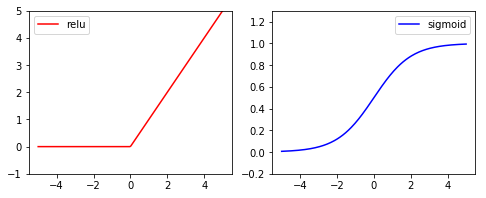

In [86]:
%matplotlib inline
import matplotlib.pyplot as plt 

plt.figure(figsize=(8, 3))
plt.subplot(121)
plt.plot(x_np, y_relu, c='red', label='relu')
plt.ylim((-1, 5))
plt.legend()

plt.subplot(122)
plt.plot(x_np, y_sigmoid, c='blue', label='sigmoid')
plt.ylim((-0.2, 1.3))
plt.legend()
plt.show()

In [1]:
import os
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt

# Hyper Parameters
EPOCH = 5           # train the training data n times
BATCH_SIZE = 100
LR = 0.01           # learning rate
DOWNLOAD_MNIST = False
if not(os.path.exists('./mnist/')) or not os.listdir('./mnist/'):
    DOWNLOAD_MNIST = True

train_data = torchvision.datasets.MNIST(
    root='./mnist/',
    train=True,                     # this is training data
    # Converts a PIL.Image or numpy.ndarray to
    # torch.FloatTensor of shape (C x H x W) 
    # and normalize in the range [0.0, 1.0]
    transform=torchvision.transforms.ToTensor(),    
    download=DOWNLOAD_MNIST,
)

torch.Size([60000, 28, 28])
torch.Size([60000])


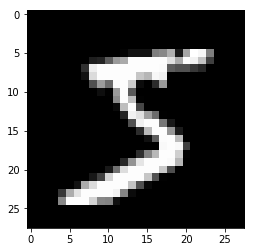

In [144]:
# plot one example
print(train_data.train_data.size())                 
print(train_data.train_labels.size())              
plt.imshow(train_data.train_data[0].numpy(), cmap='gray')
plt.show()

In [10]:
# the image batch shape will be (batch_size, 1, 28, 28)
train_loader = Data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)

# pick 2000 samples to speed up testing
test_data = torchvision.datasets.MNIST(root='./mnist/', train=False)
# shape from (2000, 28, 28) to (2000, 1, 28, 28), value in range(0,1)
test_x = torch.unsqueeze(test_data.test_data, dim=1).type(torch.FloatTensor)/255.   
test_y = test_data.test_labels
print test_x.shape, test_y.shape


 torch.Size([10000, 1, 28, 28]) torch.Size([10000])


In [13]:
#batch_size=16
print "train_data's length:",len(train_data)
print "train_loader's length:",len(train_loader)

train_data's length: 60000
train_loader's length: 600


In [4]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(         # input shape (1, 28, 28)
            nn.Conv2d(
                in_channels=1,              # input channels
                out_channels=16,            # n_filters
                kernel_size=5,              # filter size
                stride=1,                   # filter movement/step
                padding=2,                  # output width=(width−kernel_size+2pad)/stride +1
            ),                              # output width=(28-5+2*2)/1 +1=28
                                            # output shape (16, 28, 28)
            nn.ReLU(),                      # activation
            # choose max value in 2x2 area, output shape (16, 14, 14)
            nn.MaxPool2d(kernel_size=2),    
        )
        self.conv2 = nn.Sequential(         # input shape (16, 14, 14)
            nn.Conv2d(16, 32, 5, 1, 2),     # output shape (32, 14, 14)
            nn.ReLU(),                      # activation
            nn.MaxPool2d(2),                # output shape (32, 7, 7)
        )
        self.out = nn.Linear(32 * 7 * 7, 10)   # fully connected layer, output 10 classes

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        x = x.view(x.size(0), -1)      
        output = self.out(x)
        return output


In [4]:
cnn = CNN()
print(cnn)  # net architecture

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1), ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1), ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)


In [5]:
import time
from torch.autograd import Variable

optimizer = torch.optim.Adam(cnn.parameters(), lr=LR)   # optimize all cnn parameters
loss_func = nn.CrossEntropyLoss()   # the target label is not one-hotted
# training
aa=time.time()
for epoch in range(EPOCH):
    for step, (b_x, b_y) in enumerate(train_loader):
        b_x=Variable(b_x)
        b_y=Variable(b_y)
        output = cnn(b_x)               # cnn output
        loss = loss_func(output, b_y)   # cross entropy loss
        optimizer.zero_grad()           # clear gradients for this training step
        loss.backward()                 # backpropagation, compute gradients
        optimizer.step()                # apply gradients
        
        if step % 100 == 0:
            test_output = cnn(Variable(test_x))
            pred_y = torch.max(test_output, 1)[1].data.numpy()
            acc= (pred_y ==Variable(test_y).data.numpy()).astype(int).sum()/float(test_y.size(0))
            print 'Epoch:',epoch,' train loss:%.4f' %loss.data.numpy(),' test accuracy:%.3f' %acc
time.time()-aa

Epoch: 0  train loss:2.3013  test accuracy:0.097
Epoch: 0  train loss:0.1047  test accuracy:0.972
Epoch: 0  train loss:0.0377  test accuracy:0.965
Epoch: 0  train loss:0.0900  test accuracy:0.977
Epoch: 0  train loss:0.1658  test accuracy:0.977
Epoch: 0  train loss:0.1477  test accuracy:0.981
Epoch: 1  train loss:0.0304  test accuracy:0.982
Epoch: 1  train loss:0.0190  test accuracy:0.984
Epoch: 1  train loss:0.0785  test accuracy:0.985
Epoch: 1  train loss:0.0303  test accuracy:0.984
Epoch: 1  train loss:0.0574  test accuracy:0.981
Epoch: 1  train loss:0.0167  test accuracy:0.986
Epoch: 2  train loss:0.0052  test accuracy:0.982
Epoch: 2  train loss:0.0471  test accuracy:0.986
Epoch: 2  train loss:0.1207  test accuracy:0.980
Epoch: 2  train loss:0.2241  test accuracy:0.981
Epoch: 2  train loss:0.0122  test accuracy:0.984
Epoch: 2  train loss:0.1199  test accuracy:0.980
Epoch: 3  train loss:0.0918  test accuracy:0.980
Epoch: 3  train loss:0.0094  test accuracy:0.987
Epoch: 3  train loss

208.28215098381042

In [9]:
test=Variable(test_x[:30])
test_output = cnn(test)
pred_y = torch.max(test_output, 1)[1].data.numpy()

print test_output.shape,"\n"
print torch.max(test_output, 1)[0]
print torch.max(test_output, 1)[1]

torch.Size([30, 10]) 

Variable containing:
 16.0398
 18.1984
  8.2497
 11.9835
 16.7772
  9.3603
  8.3707
 13.5447
 12.6686
 10.0674
 17.9452
 16.1196
 14.8201
 17.8345
 11.0892
 14.6689
 15.8796
 19.5271
  1.6231
 19.6039
  6.7448
 15.4297
 18.0711
 16.1308
 13.1724
 12.4532
 17.7302
 24.8392
 11.5933
  7.4988
[torch.FloatTensor of size 30]

Variable containing:
 7
 2
 1
 0
 4
 1
 4
 9
 5
 9
 0
 6
 9
 0
 1
 5
 9
 7
 3
 4
 9
 6
 6
 5
 4
 0
 7
 4
 0
 1
[torch.LongTensor of size 30]



In [28]:
print pred_y, 'prediction number'
print test_y[:30].numpy(), 'real number'

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1] prediction number
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1] real number


In [11]:
import time
from torch.autograd import Variable
cnn = CNN().cuda()
optimizer = torch.optim.Adam(cnn.parameters(), lr=LR)   # optimize all cnn parameters
loss_func = nn.CrossEntropyLoss()   # the target label is not one-hotted
# training
aa=time.time()
test_x=Variable(test_x).cuda()
test_y=Variable(test_y).cuda()
for epoch in range(EPOCH):
    for step, (b_x, b_y) in enumerate(train_loader):
        b_x=Variable(b_x).cuda()
        b_y=Variable(b_y).cuda()
        output = cnn(b_x)               # cnn output
        loss = loss_func(output, b_y)   # cross entropy loss
        optimizer.zero_grad()           # clear gradients for this training step
        loss.backward()                 # backpropagation, compute gradients
        optimizer.step()                # apply gradients
        
        if step % 100 == 0:
            test_output = cnn(test_x)
            pred_y = torch.max(test_output, 1)[1].data.cpu().numpy()
            acc= (pred_y ==test_y.data.cpu().numpy()).astype(int).sum()/float(test_y.size(0))
            print 'Epoch:',epoch,' train loss:%.4f' %loss.data.cpu().numpy(),' test accuracy:%.3f' %acc
time.time()-aa

Epoch: 0  train loss:2.3063  test accuracy:0.159
Epoch: 0  train loss:0.1355  test accuracy:0.949
Epoch: 0  train loss:0.0656  test accuracy:0.969
Epoch: 0  train loss:0.1027  test accuracy:0.969
Epoch: 0  train loss:0.0703  test accuracy:0.978
Epoch: 0  train loss:0.1169  test accuracy:0.976
Epoch: 1  train loss:0.0431  test accuracy:0.981
Epoch: 1  train loss:0.0536  test accuracy:0.982
Epoch: 1  train loss:0.1091  test accuracy:0.980
Epoch: 1  train loss:0.0167  test accuracy:0.982
Epoch: 1  train loss:0.0482  test accuracy:0.980
Epoch: 1  train loss:0.1124  test accuracy:0.983
Epoch: 2  train loss:0.0253  test accuracy:0.980
Epoch: 2  train loss:0.0202  test accuracy:0.983
Epoch: 2  train loss:0.0101  test accuracy:0.982
Epoch: 2  train loss:0.0787  test accuracy:0.981
Epoch: 2  train loss:0.0762  test accuracy:0.983
Epoch: 2  train loss:0.0461  test accuracy:0.981
Epoch: 3  train loss:0.0181  test accuracy:0.985
Epoch: 3  train loss:0.0929  test accuracy:0.984
Epoch: 3  train loss

18.878260135650635

In [46]:
for i in x:
    print i
for i in output:
    print i


(0 ,.,.) = 
   0   1
   2   3

(1 ,.,.) = 
   4   5
   6   7

(2 ,.,.) = 
   8   9
  10  11

(3 ,.,.) = 
  12  13
  14  15
[torch.FloatTensor of size 4x2x2]


(0 ,.,.) = 
  16  17
  18  19

(1 ,.,.) = 
  20  21
  22  23

(2 ,.,.) = 
  24  25
  26  27

(3 ,.,.) = 
  28  29
  30  31
[torch.FloatTensor of size 4x2x2]


(0 ,.,.) = 
  32  33
  34  35

(1 ,.,.) = 
  36  37
  38  39

(2 ,.,.) = 
  40  41
  42  43

(3 ,.,.) = 
  44  45
  46  47
[torch.FloatTensor of size 4x2x2]

Variable containing:
(0 ,.,.) = 
 -1.2683 -1.1958
 -1.1233 -1.0508

(1 ,.,.) = 
 -1.1149 -1.0512
 -0.9875 -0.9238

(2 ,.,.) = 
 -0.0342 -0.0323
 -0.0303 -0.0284

(3 ,.,.) = 
 -1.0084 -0.9507
 -0.8931 -0.8355
[torch.FloatTensor of size 4x2x2]

Variable containing:
(0 ,.,.) = 
 -0.1087 -0.0362
  0.0362  0.1087

(1 ,.,.) = 
 -0.0956 -0.0319
  0.0319  0.0956

(2 ,.,.) = 
 -0.0029 -0.0010
  0.0010  0.0029

(3 ,.,.) = 
 -0.0864 -0.0288
  0.0288  0.0864
[torch.FloatTensor of size 4x2x2]

Variable containing:
(0 ,.,.) = 
  1.